# Arreglos con numpy. Parte III

## Programación para Análisis de Datos 

### Mtra. Gisel Hernández Chávez

Las matrices tienen múltiples aplicaciones, sobre todo para representar coeficientes en sistemas de ecuaciones o aplicaciones lineales, pudiendo desempeñar la matriz la misma función que los datos de un vector en aplicaciones de sistemas lineales.

### Contenido

17. Productos 

        17.1 Producto punto (dot product)
        17.2 Producto de dos vectores
        17.3 Producto interior (inner product)
        17.4 Producto exterior (outer product) o producto tensorial
18. Multiplicación de matrices en numpy usando el operador @

19. Funciones universales

        19.1 Funciones para sumar y obtener estadísticas descriptivas
        19.2 Valores booleanos y evaluación de números en condicionales
20. Iteraciones en arreglos


In [1]:
import numpy as np
from datetime import datetime

In [2]:
# Para obtener múltiples salidas de una celda
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 17 Productos

### 17.1 Producto punto

__numpy.dot(a, b, out=None)__

Calcula el producto punto de dos arreglos

+ If __both a and b are 1-D arrays__, it is __inner product of vectors__ (without complex conjugation).

+ If __both a and b are 2-D array__, it is __matrix multiplication__, but using matmul or a @ b is preferred.

+ If __either a or b is 0-D (scalar)__, it is equivalent to multiply and using numpy.multiply(a, b) or __a * b__ is preferred.

+ If __a is an N-D array__ and __b is a 1-D array__, it is a __sum product over the last axis of a and b__.

+ If __a is an N-D array__ and __b is an M-D array (where M>=2)__, it is a __sum product over the last axis of a and the second-to-last axis of b__:

dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])

In [3]:
a = [[1, 0], [0, 1]]
b = [[4, 1], [2, 2]]
a,b


([[1, 0], [0, 1]], [[4, 1], [2, 2]])

In [4]:
np.dot(a, b)

array([[4, 1],
       [2, 2]])

### Verificar que la cantidad de columnas de la primera matriz sea igual a la cantidad de filas de la segunda

1x4 + 0x2 = 4  1x4 + 0x2 = 1

0x4 + 1x2 = 2  0x1 + 1x2 = 2

### Productos punto múltiples

__linalg.multi_dot(arrays, *, out=None)[source]__

Compute the dot product of two or more arrays in a single function call, while automatically selecting the fastest evaluation order.

multi_dot chains numpy.dot and uses optimal parenthesization of the matrices [1] [2]. Depending on the shapes of the matrices, this can speed up the multiplication a lot.

If the first argument is 1-D it is treated as a row vector. If the last argument is 1-D it is treated as a column vector. The other arguments must be 2-D.

Think of multi_dot as:

def multi_dot(arrays): return functools.reduce(np.dot, arrays)

In [5]:
from numpy.linalg import multi_dot
# Prepare some data
A = np.random.random((10000, 100))
B = np.random.random((100, 1000))
C = np.random.random((1000, 5))
D = np.random.random((5, 333))
# the actual dot multiplication
_ = multi_dot([A, B, C, D])
_.shape

(10000, 333)

In [6]:
# Lo anterior se usa en lugar de
_2 = np.dot(np.dot(np.dot(A, B), C), D)
# or
_3 = A.dot(B).dot(C).dot(D)

_.all() == _2.all() == _3.all()

True

In [7]:
_ == _2

array([[False,  True, False, ..., False, False,  True],
       [ True, False,  True, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [ True, False,  True, ..., False, False, False],
       [False,  True,  True, ...,  True, False,  True],
       [ True, False,  True, ..., False,  True,  True]])

### 17.2 Producto de dos vectores

__numpy.vdot(a, b, /)__

Return the dot product of two vectors.

The vdot(a, b) function handles complex numbers differently than dot(a, b). If the first argument is complex the complex conjugate of the first argument is used for the calculation of the dot product.

Note that vdot handles multidimensional arrays differently than dot: it does not perform a matrix product, but flattens input arguments to 1-D vectors first. Consequently, it should only be used for vectors.

Parameters:
aarray_like
If a is complex the complex conjugate is taken before calculation of the dot product.

barray_like
Second argument to the dot product.

Returns:
outputndarray
Dot product of a and b. Can be an int, float, or complex depending on the types of a and b.

In [8]:
a = np.array([1+2j,3+4j])
b = np.array([5+6j,7+8j])
np.vdot(a, b)

(70-8j)

In [9]:
np.dot(b,a)

(-18+68j)

In [10]:
a = np.array([[1, 4], [5, 6]])
b = np.array([[4, 1], [2, 2]])
np.vdot(a, b)

np.vdot(b, a)

1*4 + 4*1 + 5*2 + 6*2

30

30

30

### 17.3 Producto interior (inner product)

numpy.inner(a, b, /)
Inner product of two arrays.

Ordinary inner product of vectors for 1-D arrays (without complex conjugation), in higher dimensions a sum product over the last axes.

Parameters:
a, barray_like
If a and b are nonscalar, their last dimensions must match.

Returns:
outndarray

If a and b are both scalars or both 1-D arrays then a scalar is returned; otherwise an array is returned. out.shape = (*a.shape[:-1], *b.shape[:-1])

Raises:
ValueError
If both a and b are nonscalar and their last dimensions have different sizes.

+ For vectors (1-D arrays) it computes the ordinary inner-product:

        np.inner(a, b) = sum(a[:]*b[:])

+ More generally, if ndim(a) = r > 0 and ndim(b) = s > 0:

        np.inner(a, b) = np.tensordot(a, b, axes=(-1,-1))

+ or explicitly:

        np.inner(a, b)[i0,...,ir-2,j0,...,js-2]
         = sum(a[i0,...,ir-2,:]*b[j0,...,js-2,:])

+ In addition a or b may be scalars, in which case:

        np.inner(a,b) = a*b


In [14]:
a = np.array([1,2,3])
b = np.array([0,1,0])
np.inner(a, b)

2

In [ ]:
a = np.arange(24).reshape((2,3,4))
b = np.arange(4)
a,b
b.shape

(array([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],
 
        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]]),
 array([0, 1, 2, 3]))

(4,)

In [ ]:
c = np.inner(a, b)
c.shape
c

(2, 3)

array([[ 14,  38,  62],
       [ 86, 110, 134]])

In [ ]:
np.arange(24).reshape((2,3,4)) # el arrelo 2d es de 3 filas 4 columnas

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [ ]:
a = np.arange(2).reshape((1,1,2)) # una fila con 2 columnas el más interno
b = np.arange(6).reshape((3,2))
a,b

(array([[[0, 1]]]),
 array([[0, 1],
        [2, 3],
        [4, 5]]))

In [ ]:
c = np.inner(a, b)
c.shape

c

(1, 1, 3)

array([[[1, 3, 5]]])

#### Ejercicio. Añadir un eje para hacerlos compatibles

Aquí uno es (4,) y el otro (3,). Ambos son vectores 1D, por ello es mejor hacer un inner product.  
Pero, para poder multiplicarlos, necesitan tener (x,1)

In [15]:
# No son compatibles
a = np.array([1,2,3,4])
b = np.array([0,1,0])
np.inner(a, b)

ValueError: shapes (4,) and (3,) not aligned: 4 (dim 0) != 3 (dim 0)

In [20]:
a = np.array([1,2,3,4])
b = np.array([0,1,0])

# Primera forma es añadir hilera de nans
# b = np.array([0,1,0,np.nan])
# b
# np.inner(a,b) # Esto da nan

# Segunda forma es añadirle ejes a ambos
a = a[: ,np.newaxis]
a.shape
a

b = b[: ,np.newaxis]
b.shape
b

np.inner(a,b)

(4, 1)

array([[1],
       [2],
       [3],
       [4]])

(3, 1)

array([[0],
       [1],
       [0]])

array([[0, 1, 0],
       [0, 2, 0],
       [0, 3, 0],
       [0, 4, 0]])

### 17.4 Producto exterior (outer product) o producto tensorial

numpy.outer(a, b, out=None)[source]

Compute the outer product of two vectors.

Given two vectors, a = [a0, a1, ..., aM] and b = [b0, b1, ..., bN], the outer product [1] is:

[[a0*b0  a0*b1 ... a0*bN ]
 [a1*b0    .
 [ ...          .
 [aM*b0            aM*bN ]]

En álgebra lineal, el producto exterior de dos vectores de coordenadas es una matriz. 

+ Si los **dos vectores** tienen dimensiones **n** y **m**, entonces su **producto exterior** es una **matriz n × m**. 

Su signature en numpy:

    numpy.outer(a, b, out=None)

    a(M,) como un arreglo
    Primer vector de entrada. La entrada se aplana si aún no es unidimensional.

    b(N,) tipo_arreglo
    Segundo vector de entrada. La entrada se aplana si aún no es unidimensional.

    out(M, N) ndarray, opcional
    Una ubicación donde se almacena el resultado.


+ De manera más general, **dados dos tensores** (matrices multidimensionales de números), **su producto exterior es un tensor**. 
    + El **producto exterior de los tensores** también se conoce como su **producto tensorial** y se puede utilizar para definir el álgebra tensorial.
    
**El producto exterior contrasta con**:

+ El producto punto (**dot product**), que es un caso especial de "producto interno" (**inner product**), que toma un par de vectores de coordenadas como entrada y produce un escalar.

+ El producto de Kronecker, que toma un par de matrices como entrada y produce una matriz de bloques

+ La multiplicación de matrices estándar

In [ ]:
# Ejemplo con vector de letras
x = np.array(['a', 'b', 'c'], dtype=object)
np.outer(x, [1, 2, 3])


array([['a', 'aa', 'aaa'],
       ['b', 'bb', 'bbb'],
       ['c', 'cc', 'ccc']], dtype=object)

In [ ]:
np.inner(x, [1, 2, 3])

array([50, 68])

In [ ]:
x = np.array([2, 1, 2], dtype=object)
np.outer(x, [1, 2, 3])

array([[2, 4, 6],
       [1, 2, 3],
       [2, 4, 6]], dtype=object)

In [ ]:
x = np.array([2, 1, 22,3], dtype=object)
np.outer(x, [1, 2, 3])

array([[2, 4, 6],
       [1, 2, 3],
       [22, 44, 66],
       [3, 6, 9]], dtype=object)

La transmisión proporciona una forma conveniente de tomar el producto externo (o cualquier otra operación externa) de dos arreglos. El siguiente ejemplo muestra una operación de suma externa de dos matrices 1-d.


In [ ]:
a,b

(array([[[0, 1]]]),
 array([[0, 1],
        [2, 3],
        [4, 5]]))

In [ ]:
# Outer product
np.outer(a, b, out=None)  # Es lo mismo que out[i, j] = a[i] * b[j]

array([[0, 0, 0, 0, 0, 0],
       [0, 1, 2, 3, 4, 5]])

In [ ]:
np.outer(a, b, out=None) == a * b

C:\Users\ghernand\AppData\Local\Temp\ipykernel_28992\3085423260.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  np.outer(a, b, out=None) == a * b


False

In [ ]:
a * b # se multiplica a por b, elemento por elemento

array([[[0, 1],
        [0, 3],
        [0, 5]]])

## 18. Multilicación de arreglo por otro arreglo con operador @

Algoritmo en pseudocódigo:
Input matrices A and B
Specify a result matrix C of the appropriate size
For i from 1 to N:
    For j from 1 to P:
        Let sum = 0
        For k from 1 to M:
            Set sum ← sum + Aik × Bkj
        Set Cij ← sum
Return C


+ Recuerde que el número de columnas de la primera matriz debe ser igual al número de filas de las segunda matriz
+ Se implementa con 

numpy.matmul(x1, x2, /, out=None, *, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj, axes, axis]) = <ufunc 'matmul'>

+ El operador @ ejecuta a matmul()

El comportamiento depende de los argumentos de la siguiente manera.

+ Si ambos argumentos son 2-D, se multiplican como matrices convencionales.

+ Si alguno de los argumentos es N-D, N > 2, se trata como una pila de matrices que residen en los dos últimos índices y se transmite en consecuencia.

+ Si el primer argumento es 1-D, se promociona a una matriz anteponiendo un 1 a sus dimensiones. Después de la multiplicación de matrices, se elimina el 1 antepuesto.

+ Si el segundo argumento es 1-D, se promociona a una matriz agregando un 1 a sus dimensiones. Después de la multiplicación de matrices, se elimina el 1 adjunto.

### matmul se diferencia de dot en dos aspectos importantes:

+ No se permite la multiplicación por escalares, use * en su lugar.

+ Las pilas de matrices se transmiten juntas como si las matrices fueran elementos, respetando la firma (n,k),(k,m)->(n,m):


In [ ]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
product = A @ B
print(product)

[[19 22]
 [43 50]]


In [ ]:
A @ 3

ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

In [ ]:
x= np.array([[[1],
        [2],
        [3]],

       [[4],
        [5],
        [6]]])

In [ ]:
arr0 = np.array(42)

In [ ]:
x.shape, arr0.shape

((2, 3, 1), ())

In [ ]:
try:
    x @ arr0  # Arroja error porque no pueden multiplicarse
except ValueError as e:
    print(e)
    

matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)


In [ ]:
a.shape, b.shape

((1, 1, 2), (3, 2))

In [ ]:
a = np.array([1,2,3])
b = np.array([4,5,6])
a @ b # Esta es una multiplicación de dos vectores (arreglos de una dimensión)

32

In [ ]:
a1 = np.array([[ 0.0,  0.0,  0.0],
           [10.0, 10.0, 10.0],
           [20.0, 20.0, 20.0],
           [30.0, 30.0, 30.0]])
b1 = np.array([1.0, 2.0, 3.0])
a1 + b1

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

### Comparar eficiencia de multiplicar y agregar a una lista vs usar operación vectorizada

In [ ]:
a = np.array(range(10000)) 
b = np.array(range(10000))
c = []

#start = time.process_time()
start = datetime.now()
# bloque de código para medir tiempo    
for i in range(len(a)):
    c.append(a[i]*b[i])
end = datetime.now()
print((end - start)) # de tipo timedelta

0:00:00.006248


In [ ]:
type(start)

datetime.datetime

In [ ]:
c

[0,
 1,
 4,
 9,
 16,
 25,
 36,
 49,
 64,
 81,
 100,
 121,
 144,
 169,
 196,
 225,
 256,
 289,
 324,
 361,
 400,
 441,
 484,
 529,
 576,
 625,
 676,
 729,
 784,
 841,
 900,
 961,
 1024,
 1089,
 1156,
 1225,
 1296,
 1369,
 1444,
 1521,
 1600,
 1681,
 1764,
 1849,
 1936,
 2025,
 2116,
 2209,
 2304,
 2401,
 2500,
 2601,
 2704,
 2809,
 2916,
 3025,
 3136,
 3249,
 3364,
 3481,
 3600,
 3721,
 3844,
 3969,
 4096,
 4225,
 4356,
 4489,
 4624,
 4761,
 4900,
 5041,
 5184,
 5329,
 5476,
 5625,
 5776,
 5929,
 6084,
 6241,
 6400,
 6561,
 6724,
 6889,
 7056,
 7225,
 7396,
 7569,
 7744,
 7921,
 8100,
 8281,
 8464,
 8649,
 8836,
 9025,
 9216,
 9409,
 9604,
 9801,
 10000,
 10201,
 10404,
 10609,
 10816,
 11025,
 11236,
 11449,
 11664,
 11881,
 12100,
 12321,
 12544,
 12769,
 12996,
 13225,
 13456,
 13689,
 13924,
 14161,
 14400,
 14641,
 14884,
 15129,
 15376,
 15625,
 15876,
 16129,
 16384,
 16641,
 16900,
 17161,
 17424,
 17689,
 17956,
 18225,
 18496,
 18769,
 19044,
 19321,
 19600,
 19881,
 20164,
 2

In [ ]:
len(c)

10000

In [ ]:
c[10000-1]

99980001

Esto produce la respuesta correcta, pero si a y b contienen millones de números cada uno, pagaremos el precio por las ineficiencias de los bucles en Python.

NumPy nos da lo mejor de ambos mundos: las __operaciones vectorizadas elemento por elemento__ son el "modo predeterminado" cuando se trata de un ndarray. En NumPy:

In [ ]:
# Operación vectorizada
start = datetime.now()
d = a * b
end = datetime.now()

print ('La operación tomó:{}'.format(end - start))

La operación tomó:0:00:00


In [ ]:
c == d

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
d[10000-1]

99980001

Con muchos datos puede aparecer un Warning como:

RuntimeWarning: overflow encountered in long_scalars

### Posible solución:

Este error suele surgir porque el tipo de datos que está utilizando no puede manejar el tamaño del número que está intentando manipular. Por ejemplo, el número más grande que puede manipular con int32 es 2147483647.
Dependiendo del tamaño de los números con los que esté tratando, configurar el tipo de datos en int64 o float64 __podría__ resolver el problema. P.ej. a continuación se convierte mi_lista a un arreglo de flotantes de 64 bits:


In [ ]:
mi_lista =[4.2,3.33,234567891111.67]
type(mi_lista[2])

float

In [ ]:
numpy_array = np.array (mi_lista, dtype = np.float64)
type(numpy_array[2]), numpy_array

(numpy.float64, array([4.20000000e+00, 3.33000000e+00, 2.34567891e+11]))

### Eficiencia en conversión de la cadena en format de fecha ISO al tipo datetime64 de numpy 

+ Se puede emplear para restar dos tiempos

In [ ]:
start = np.datetime64('2021-02-18T12:44:04.392368')
start

numpy.datetime64('2021-02-18T12:44:04.392368')

In [ ]:
a = np.array(range(10000)) 
b = np.array(range(10000))
c = []

start = datetime.now().isoformat(timespec='microseconds')
start = np.datetime64(start)
# bloque de código para medir tiempo    
for i in range(len(a)):
    c.append(a[i]*b[i])
end = datetime.now().isoformat(timespec='microseconds')
end = np.datetime64(end)
print((end - start)) # La respuesta es el total de microsegundos

8005 microseconds


In [ ]:
a = np.array(range(100000)) 
b = np.array(range(100000))
c = []

#start = time.process_time()
start = datetime.now()
# bloque de código para medir tiempo    
for i in range(len(a)):
    c.append(a[i]*b[i])
end = datetime.now()
print((end - start)) # de tipo timedelta

0:00:00.090354


C:\Users\ghernand\AppData\Local\Temp\ipykernel_28992\164564047.py:9: RuntimeWarning: overflow encountered in long_scalars
  c.append(a[i]*b[i])


## 19. Funciones universales

Una **función universal** (`ufunc` para abreviar) es una función que:

+ Opera en ndarrays elemento por elemento, 
+ Admite "broadcasting" de arreglos,
+ Admite la conversión de tipos y varias otras características estándar. 
+ Es un contenedor "vectorizado" para una función que toma un número fijo de entradas específicas y produce un número fijo de salidas específicas.

Para profundizar en este tema: [ https://docs.scipy.org/doc/numpy/reference/ufuncs.html ] Ver listado de ufun()

Incluye funciones para operaciones matemáticas diversas, trigonometría, operaciones de bit y de comparación.

numpy.ufunc()

Actualmente hay más de 60 funciones universales definidas en numpy en uno o más tipos, que cubren una amplia variedad de operaciones. Algunos de estos ufuncs se llaman automáticamente en arreglos cuando se usa la notación infija (por ejemplo, add(a, b) se llama internamente cuando se escribe a + b y a o b es un ndarray).

### 19.1 Funciones para sumar y obtener estadísticas descriptivas

In [ ]:
d.sum() #suma de los elementos del arreglo

-1724114088

In [ ]:
d.mean() #media de los elementos del arreglo

33328333.5

In [ ]:
d.std() #desviación estándar poblacional

29811444.437432263

In [ ]:
d.max() #máximo

99980001

In [ ]:
d.min() #mínimo

0

### 19.2 Valores booleanos y evaluación de números en condicionales

In [ ]:
1 == True

True

In [ ]:
2 == True

False

In [ ]:
if 4 : 
    print('No es cero')

No es cero


In [ ]:
0 == True

False

In [ ]:
matriz_bool =np.ones((3,3),dtype=bool)
matriz_bool

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [ ]:
matriz_bool.dtype

dtype('bool')

In [ ]:
nuevo = np.array([0. , 3.6, 0.8, 1.2, 1.6])

In [ ]:
nuevo.all() #devuelve True si todos los elementos se evalúan a verdadero

False

In [ ]:
np.array([1,1,1]).all()

True

In [ ]:
nuevo.any() #devuelve True si cualquiera de los elementos se evalúa como verdadero

True

In [ ]:
np.array([0,0,0]).all()

False

In [ ]:
nuevo

array([0. , 3.6, 0.8, 1.2, 1.6])

In [ ]:
nuevo.nonzero() #retorna los índices de los elementos que no son ceros

(array([1, 2, 3, 4], dtype=int64),)

In [ ]:
a=np.array([1,0,1])
a.nonzero()     #retorna los índices de los elementos que no son ceros

(array([0, 2], dtype=int64),)

In [ ]:
a = np.array([1,2,3],float) 
b = np.array([5,2,6],float) 
a + b 

array([6., 4., 9.])

### Adición externa (outer adition)

In [ ]:
a = np.array([0.0, 10.0, 20.0, 30.0])

a.shape

(4,)

In [ ]:
b = np.array([1.0, 2.0, 3.0])
z = a[:, np.newaxis]
z.shape
a.shape

(4, 1)

(4,)

In [ ]:
a[:, np.newaxis] + b

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

La mayoría de los métodos tienen funciones equivalentes

In [ ]:
nuevo.sum() 
np.sum(nuevo) 

7.200000000000001

7.200000000000001

## 20. Iteraciones en arreglos

+ Se puede realizar de forma tradicional con estructuras de repetición como el for
+ El iterador de objetos **nditer()** proporciona muchas formas flexibles de visitar todos los elementos de uno o más arreglos de forma sistemática.
+ Para profundizar en este tema vea: https://numpy.org/doc/stable/reference/arrays.nditer.html

In [ ]:
a = np.arange(6).reshape(2,3)
for x in np.nditer(a):
    print(x, end=' ')

0 1 2 3 4 5 

### Orden del recorrido

Hay momentos en los que es importante visitar los elementos de un arreglo en un orden específico, independientemente de la disposición de los elementos en la memoria. El objeto **nditer** proporciona un parámetro de orden para controlar este aspecto de la iteración. El valor predeterminado, que tiene el comportamiento descrito anteriormente, es order='K' para mantener el orden existente. Esto se puede anular con order='C' para orden C y order='F' para orden Fortran.

In [ ]:
a = np.arange(6).reshape(2,3)
print('Orden F')
for x in np.nditer(a, order='F'):
    print(x, end=' ')

Orden F
0 3 1 4 2 5 

In [ ]:
print('\nOrdenC')
for x in np.nditer(a, order='C'):
    print(x, end=' ')


OrdenC
0 1 2 3 4 5 

### Permitir modificaciones

De forma predeterminada, se trata el operando de entrada como un objeto de solo lectura. Para poder modificar los elementos del arreglo, debe especificar el modo de lectura-escritura o de solo escritura usando los indicadores por operando "lectura-escritura" o "solo-escritura".

El nditer lo hará

In [ ]:
a = np.arange(6).reshape(2,3)
with np.nditer(a, op_flags=['readwrite']) as it:
    for x in it:
        x[...] = 2 * x
a

array([[ 0,  2,  4],
       [ 6,  8, 10]])

In [ ]:
# El arreglo es un iterable y se puede usar un ciclo for
arr1 = np.array([1,2,3])
for i in arr1:
    print(i)

1
2
3


In [ ]:
# En arreglo 2D note que no se imprimen comas
arr2 = np.array([[1,2,3], [4,5,6]])
for i in arr2:
    print(i)

[1 2 3]
[4 5 6]


In [ ]:
# En lista 2D noten que se imprimen comas
lis2 = [[1,2,3], [4,5,6]]
for i in lis2:
    print(i)

[1, 2, 3]
[4, 5, 6]


In [ ]:
for i in arr2:
    for j in i:
        print(j)

1
2
3
4
5
6


In [ ]:
arr2D = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr2D
arr2D.shape
for x in arr2D:
    print("x represents the 2-D array:")
    print(x)

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

(2, 2, 3)

x represents the 2-D array:
[[1 2 3]
 [4 5 6]]
x represents the 2-D array:
[[ 7  8  9]
 [10 11 12]]


In [ ]:
 
arreglo = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arreglo.shape
# 2 veces matriz de 2 x 3   

(2, 2, 3)

In [ ]:
# Observar que opera elemento a elemento sin hacer for anidados
for i in np.nditer(arreglo):
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12


In [ ]:
for i in arreglo: 
    for j in i:
        for k in j:
            print(k)

1
2
3
4
5
6
7
8
9
10
11
12


In [ ]:
for j in range(len(arreglo[0])): 
    for i in range(len(arreglo[0])):
        print(arreglo[0][j][i])

1
2
4
5


In [ ]:

arreglo.reshape(12,1)


array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12]])

In [ ]:
arreglo2 = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
for i in arreglo2: 
    print("i representa el arreglo 2-D siguiente:")
    print(i)

i representa el arreglo 2-D siguiente:
[[1 2 3]
 [4 5 6]]
i representa el arreglo 2-D siguiente:
[[ 7  8  9]
 [10 11 12]]


## Extra. Gráficos en 3D

Se quiere ver el cruce, para verificar que el __sistema de ecuaciones__ sea resolvible.

In [32]:
import matplotlib.pyplot as plt

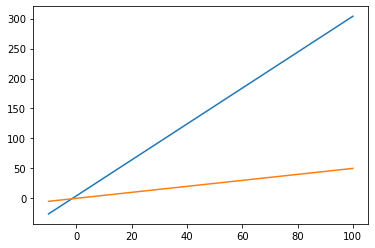

In [33]:
# Primero creamos nuestro linspace
x1 = np.linspace(-10,100,50)

plt.plot(x1, 4+3*x1);
plt.plot(x1,x1/2);

Entonces funciona un 3D. Tienes 4x1+x2=1800 y x1+3x2=3000. Se quieren encontrar los puntos en común.

Wall time: 47.9 ms


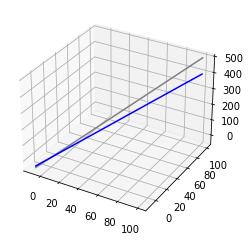

In [37]:
%%time
# Primero creamos nuestro linspace
x2 = x1.copy()

# Proyección 3D
ax = plt.axes(projection = '3d')

# Líneas de datos
ax.plot3D(x1,x2, 4*x1 + x2 ,'gray');
ax.plot3D(x1,x2, x1 + 3*x2 ,'blue');

# Scatter de datos
# ax.scatter3D(x1,x2,3*x1 + x2, cmap='Greens');


## Ejercicio 1

Invertir el orden de las filas de la matriz a = np.array([[1, 2], [3, 4], [5, 6]], float) 


In [ ]:
a

array([[ 0,  2,  4],
       [ 6,  8, 10]])

In [ ]:
a[::-1]  #invierte el orden de las filas

array([[ 6,  8, 10],
       [ 0,  2,  4]])

## Ejercicio 2


Invertir las filas y las columnas de la matriz a = np.array([[1, 2], [3, 4], [5, 6]], float) 

In [ ]:
a = np.array([[1, 2], [3, 4], [5, 6]], float)

In [ ]:
a.T

array([[1., 3., 5.],
       [2., 4., 6.]])

In [ ]:
np.flipud(a)

array([[5., 6.],
       [3., 4.],
       [1., 2.]])

## Ejercicio 3

Mostrar el último elemento de la matriz a = np.array([[1, 2], [3, 4], [5, 6]], float) 

In [ ]:
a[-1]  #muestra el último elemento (fila)

array([5., 6.])

In [ ]:
a[-1,-1]

6.0

## Ejercicio 4

Mostrar todas las filas de la matriz a = np.array([[1, 2], [3, 4], [5, 6]], float) , excepto la última

In [ ]:
a[:-1]  #muestra todos los elementos excepto el último

array([[1., 2.],
       [3., 4.]])

## Ejercicio 5

Invertir filas y columnas de la matriz a = np.array([[1, 2], [3, 4], [5, 6]], float) , excepto la última

In [ ]:
a[::-1,::-1 ]  #invierte filas y columnas

array([[6., 5.],
       [4., 3.],
       [2., 1.]])

In [ ]:
a[:-1,:-1 ]

array([[1.],
       [3.]])

## Ejercicio 6

Invertir las columnas de la matriz a = np.array([[1, 2], [3, 4], [5, 6]], float) , excepto la última

In [ ]:
a[::,::-1]  #invierte las columnas

array([[2., 1.],
       [4., 3.],
       [6., 5.]])

### Filtrado (subarreglos resultantes) con condición en los corchetes

**Ejercicio. Extraer números impares**

+ Colocar condición en los corchetes

In [ ]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
impares=arr[arr%2 == 1]
print(impares)

[1 3 5 7 9]
